# 1. Packages & Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,175 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

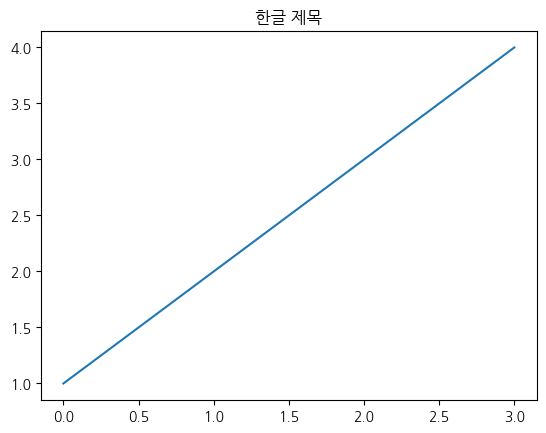

In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from statsmodels.stats.proportion import proportion_confint

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
%cd /content/drive/MyDrive/Machine Learning project/Data

/content/drive/MyDrive/Machine Learning project/Data


In [7]:
attrition = pd.read_csv('3.WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1.EDA & Processing

In [8]:
# 데이터의 모양 알아보기
print(attrition.shape)

(1470, 35)


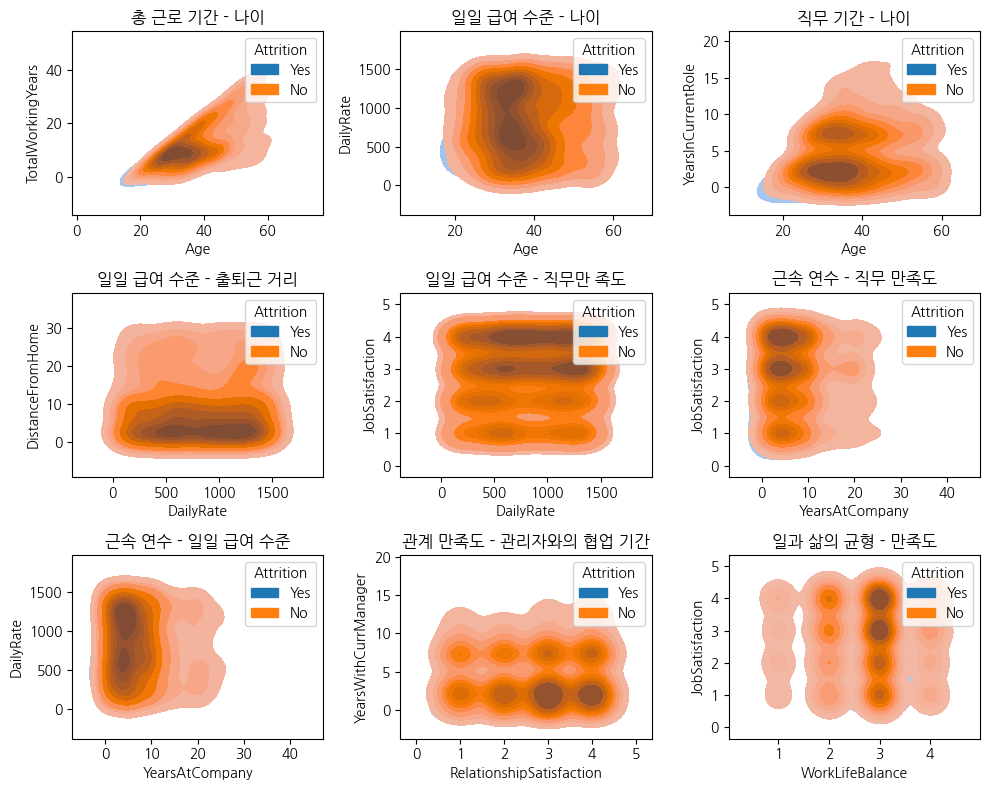

In [9]:
# 여러 개의 KDE Plot 생성 준비
f, axes = plt.subplots(3, 3, figsize=(10, 8),
                       sharex=False, sharey=False)

# Plot 색상 설정
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
sns.kdeplot(data=attrition, x="Age", y="TotalWorkingYears", hue="Attrition", fill=True, cmap=cmap, cut=5, ax=axes[0,0])
axes[0,0].set( title = '총 근로 기간 - 나이')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# Generate and plot
sns.kdeplot(data=attrition, x="Age", y="DailyRate", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = '일일 급여 수준 - 나이')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
sns.kdeplot(data=attrition, x="Age", y="YearsInCurrentRole", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = '직무 기간 - 나이')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
sns.kdeplot(data=attrition, x="DailyRate", y="DistanceFromHome", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set( title = '일일 급여 수준 - 출퇴근 거리')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
sns.kdeplot(data=attrition, x="DailyRate", y="JobSatisfaction", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set( title = '일일 급여 수준 - 직무만 족도')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
sns.kdeplot(data=attrition, x="YearsAtCompany", y="JobSatisfaction", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set( title = '근속 연수 - 직무 만족도')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
sns.kdeplot(data=attrition, x="YearsAtCompany", y="DailyRate", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set( title = '근속 연수 - 일일 급여 수준')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
sns.kdeplot(data=attrition, x="RelationshipSatisfaction", y="YearsWithCurrManager", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set( title = '관계 만족도 - 관리자와의 협업 기간')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
sns.kdeplot(data=attrition, x="WorkLifeBalance", y="JobSatisfaction", hue="Attrition", fill=True, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set( title = '일과 삶의 균형 - 만족도')

f.tight_layout()

In [10]:
# 결측값 확인
attrition.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
# 중복된 항목 수 확인
print("중복된 항목 수 :", len(attrition[attrition.duplicated()]))

중복된 항목 수 : 0


In [13]:
# 퇴직 여부(Yes/No)에 따라 각각 1, 0 으로 할당
target_map = {'Yes':1, 'No':0}

# pandas apply 를 이용하여 퇴직 여부를 1, 0 으로 표시한 새로운 컬럼 생성
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])
attrition["Attrition_numerical"].value_counts()

0    1233
1     237
Name: Attrition_numerical, dtype: int64

In [14]:
y = attrition['Attrition'].copy()
y = y.isin(['Yes']).astype('int')
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [15]:
print(attrition.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
# 데이터 타입별 컬럼 수 확인
dtype_data = attrition.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0       int64     27
1      object      9


In [17]:
# pandas 의 select_dtypes('object') 사용
attrition.select_dtypes(include=['object','category']).head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [18]:
cat_feat = attrition.select_dtypes('object','category').columns.values
attrition_cat = attrition[cat_feat].copy()
print(attrition_cat.nunique().sort_values())

Over18            1
Attrition         2
Gender            2
OverTime          2
BusinessTravel    3
Department        3
MaritalStatus     3
EducationField    6
JobRole           9
dtype: int64


In [19]:
# Over18 고유한 값 제거, 목표 변수 제거
attrition_cat = attrition_cat.drop(['Over18','Attrition'], axis=1, errors='ignore')

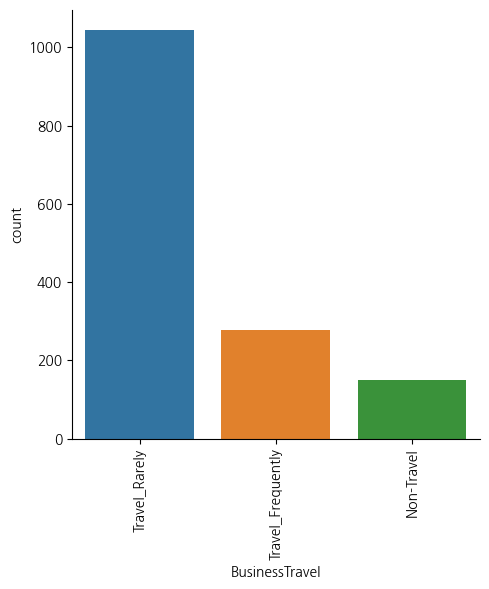

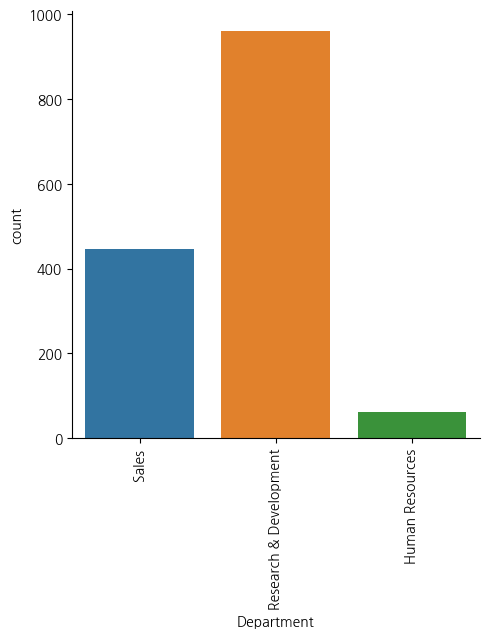

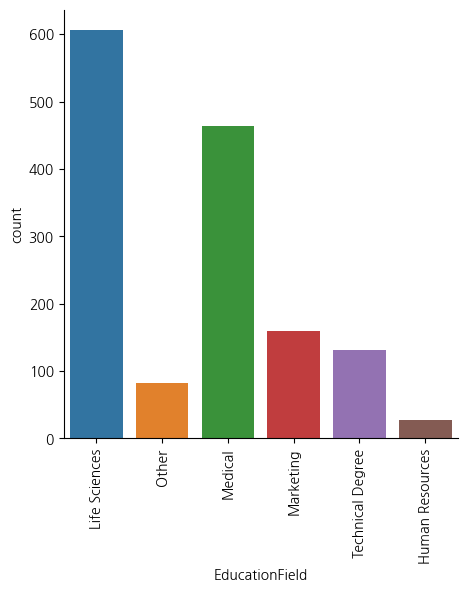

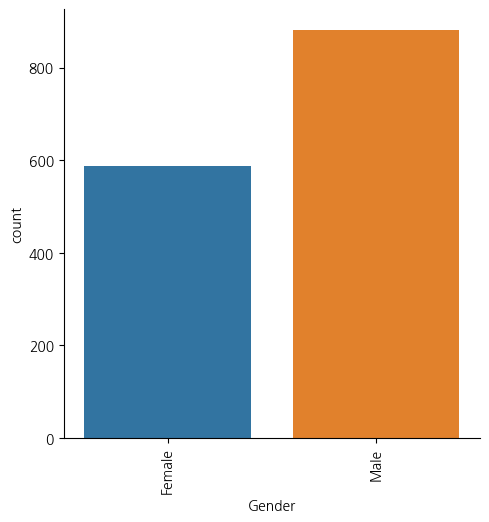

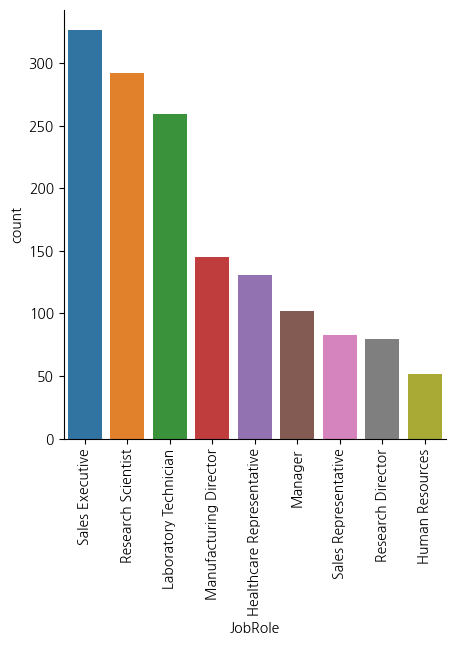

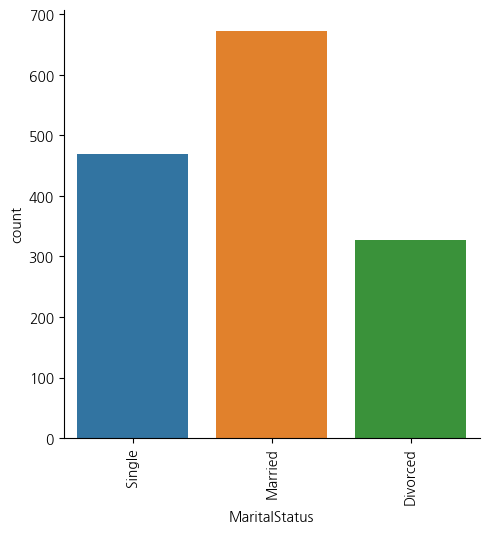

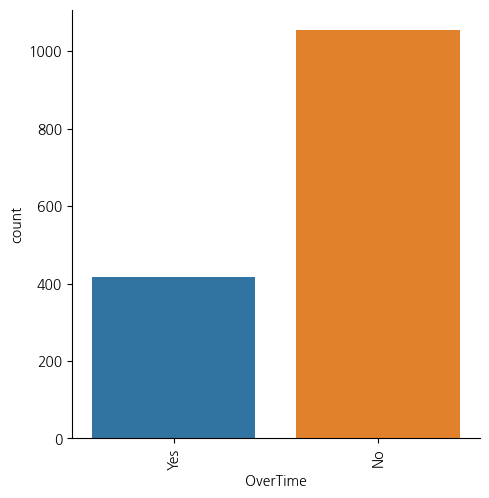

In [20]:
for col in attrition_cat.columns:
  fig = sns.catplot(x=col, kind="count", data=attrition_cat, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.show()

In [21]:
# 범주형 encoding
attrition_cat_dummies = pd.get_dummies(attrition_cat)
attrition_cat_dummies.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [22]:
# Onehot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
attrition_cat_ohe = ohe.fit_transform(attrition_cat).toarray()
attrition_cat_ohe = pd.DataFrame(attrition_cat_ohe)
attrition_cat_ohe.columns = ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']

In [24]:
# 숫자형 컬럼
# pandas 의 select_dtypes('object') 사용
attrition.select_dtypes(include=['number']).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,1102,1,2,1,1,2,94,3,2,...,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,...,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,...,80,1,6,3,3,2,2,2,2,0


In [26]:
num_feat = attrition.select_dtypes('number').columns.values
attrition_num = attrition[num_feat].copy()

In [27]:
print(attrition_num.nunique().sort_values())

EmployeeCount                  1
StandardHours                  1
Attrition_numerical            2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
EmployeeNumber              1470
dtype: int64


In [28]:
print(attrition.shape)

(1470, 36)


In [29]:
attrition_num = attrition_num.drop(['StandardHours','EmployeeCount','EmployeeNumber','Attrition_numerical'], axis=1, errors='ignore')

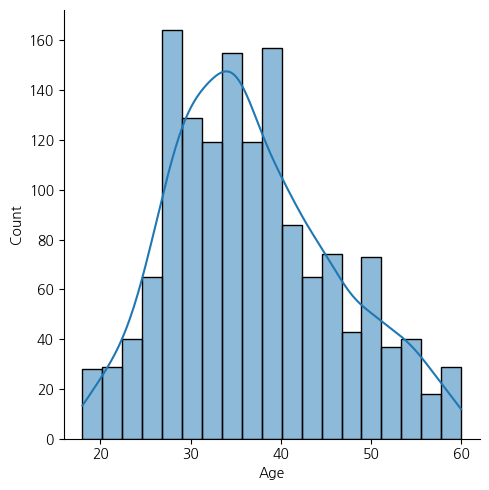

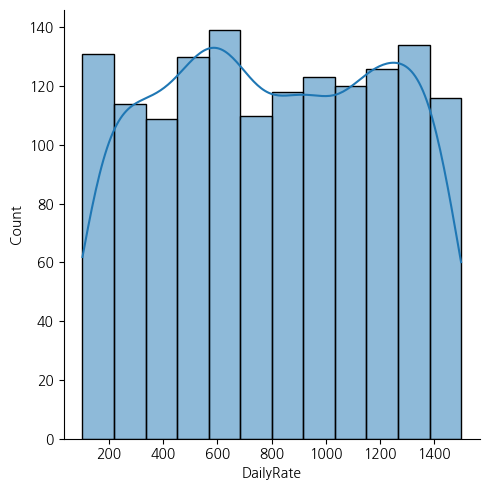

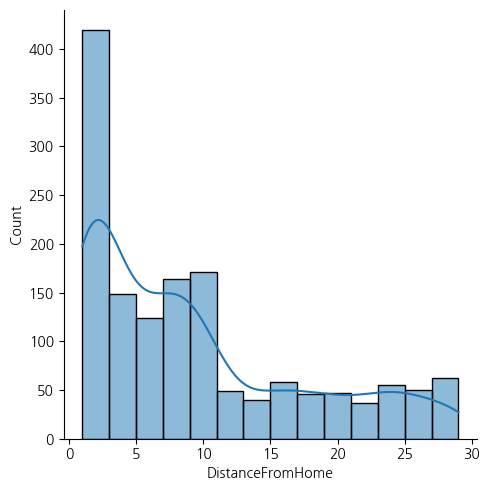

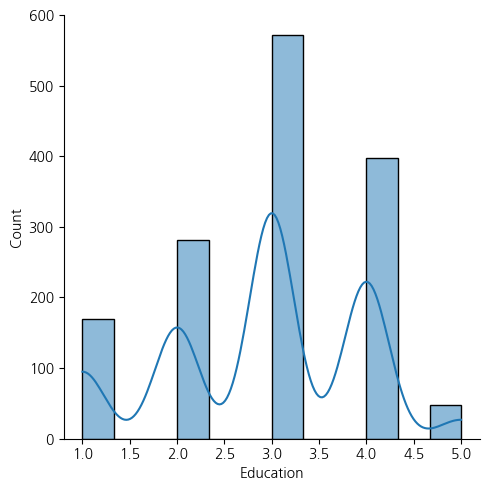

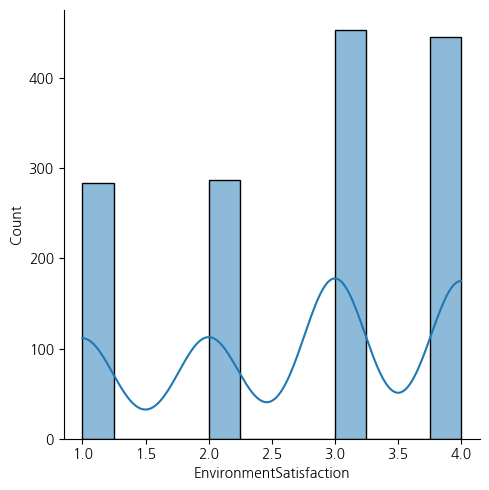

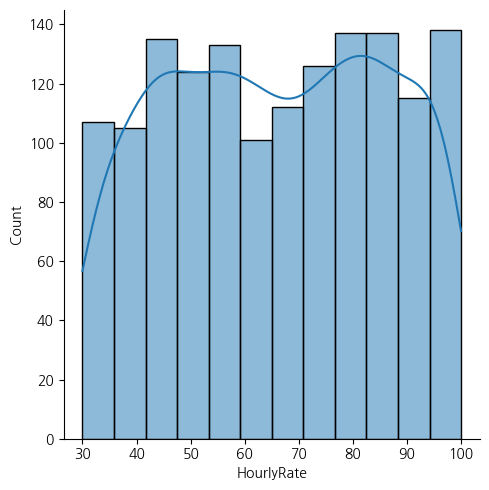

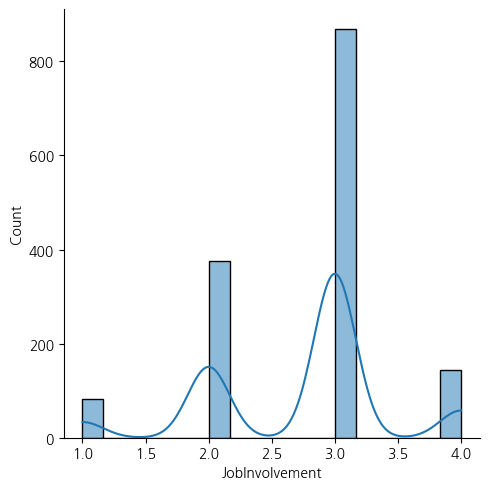

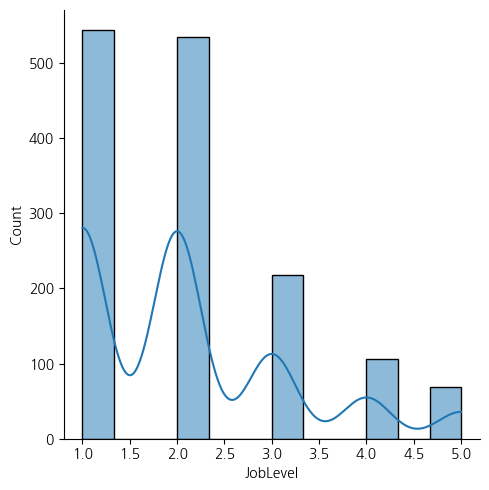

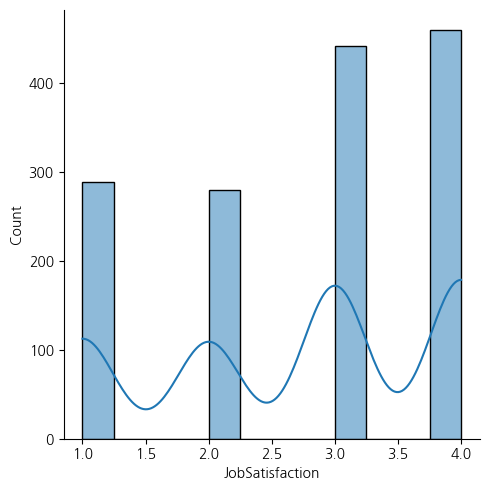

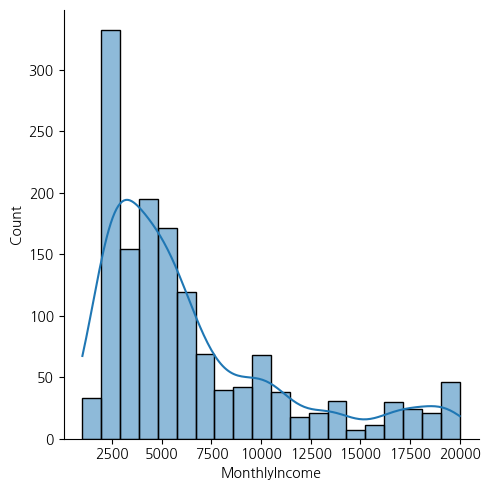

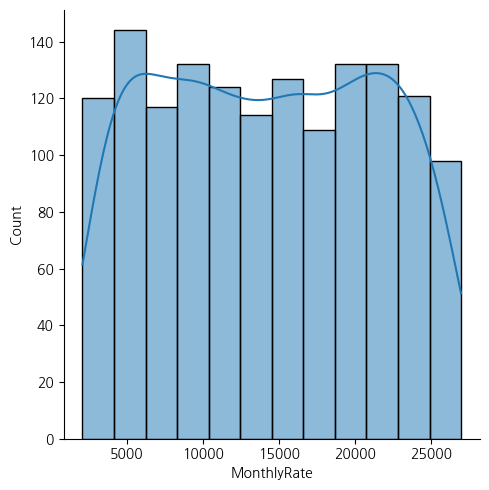

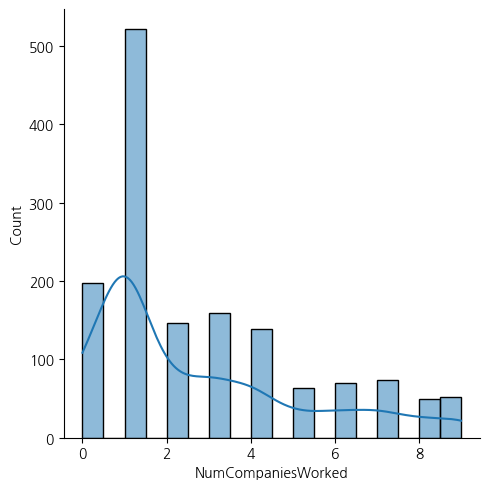

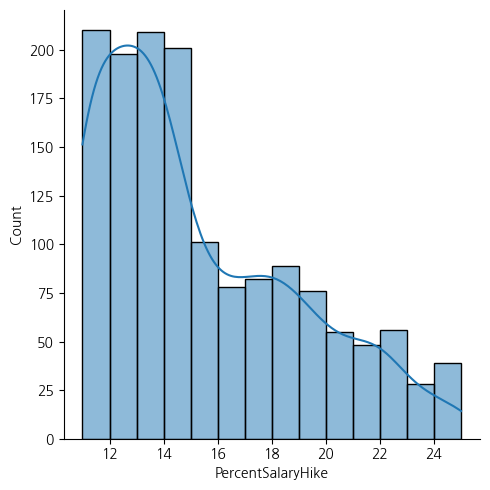

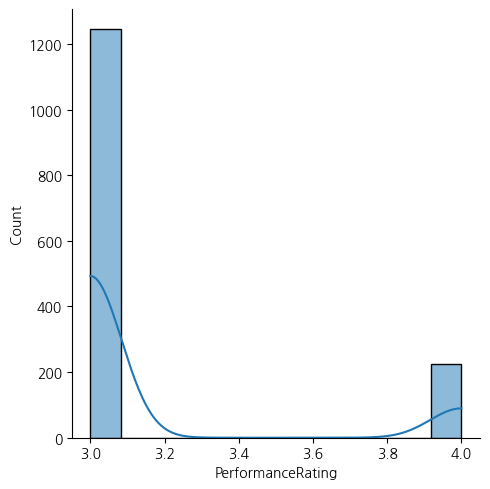

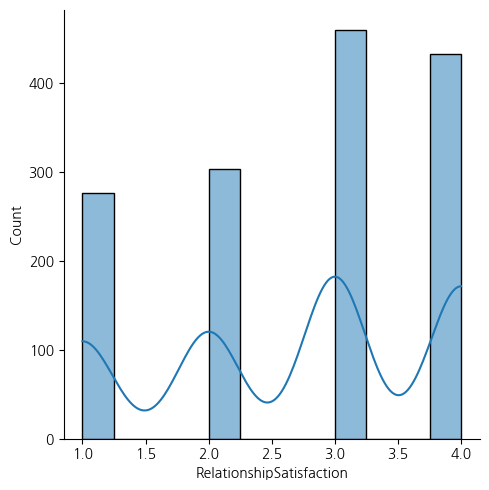

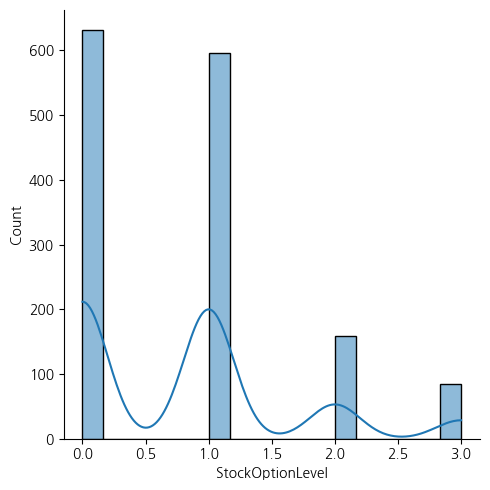

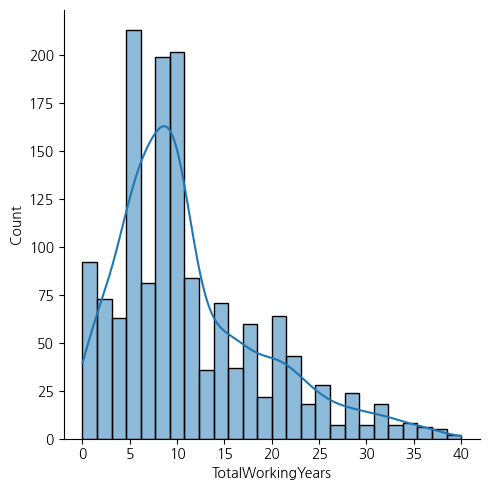

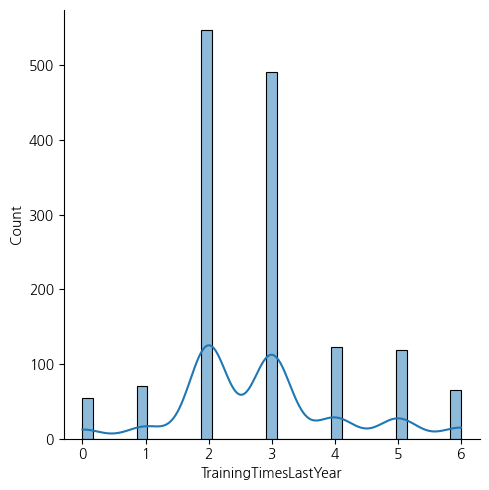

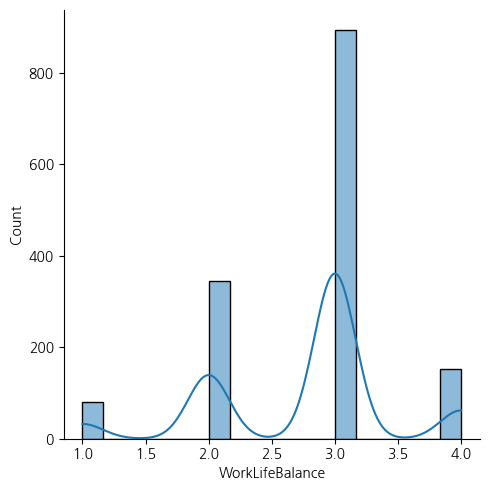

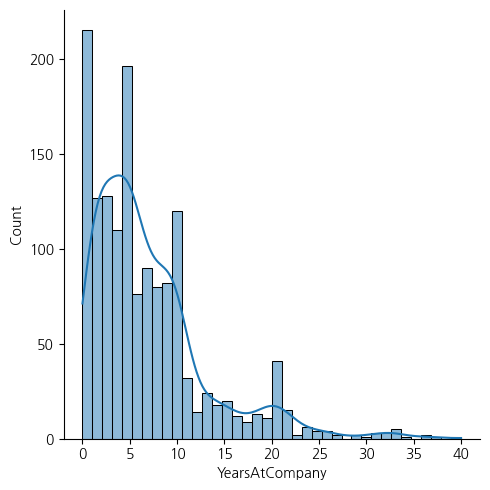

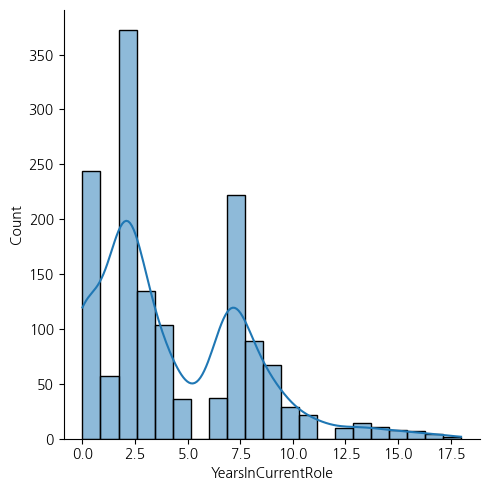

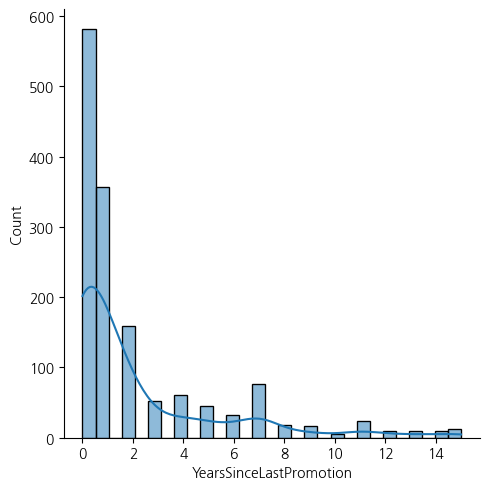

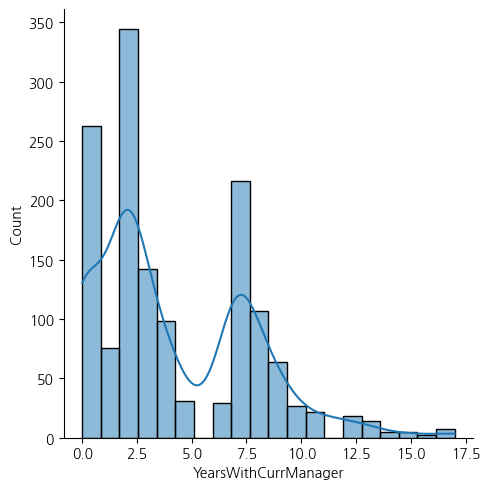

In [30]:
col_attrition_num = attrition_num.columns.values
for i in range(0,len(col_attrition_num)):
    sns.displot(attrition_num[col_attrition_num[i]],kde=True) # kde : kernel density

In [31]:
# 숫자형 컬럼 상관계수
  # * 데이터 확인
  # * 숫자형 컬럼들 간 Pearson R 상관 계수를 구한다
  # * 상관 계수가 0.9 이상인 컬럼들 중 가장 큰 컬럼을 제거해 본다
  # * 컬럼들 간 조합 생성 : comb_num_feat = np.array(list(combinations(num_feat, 2)))
  # * Pearson R 상관 계수 구하기 : pearsonr(x1, x2)[0]

In [32]:
attrition_num.nunique().sort_values()

PerformanceRating              2
WorkLifeBalance                4
EnvironmentSatisfaction        4
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
dtype: int64

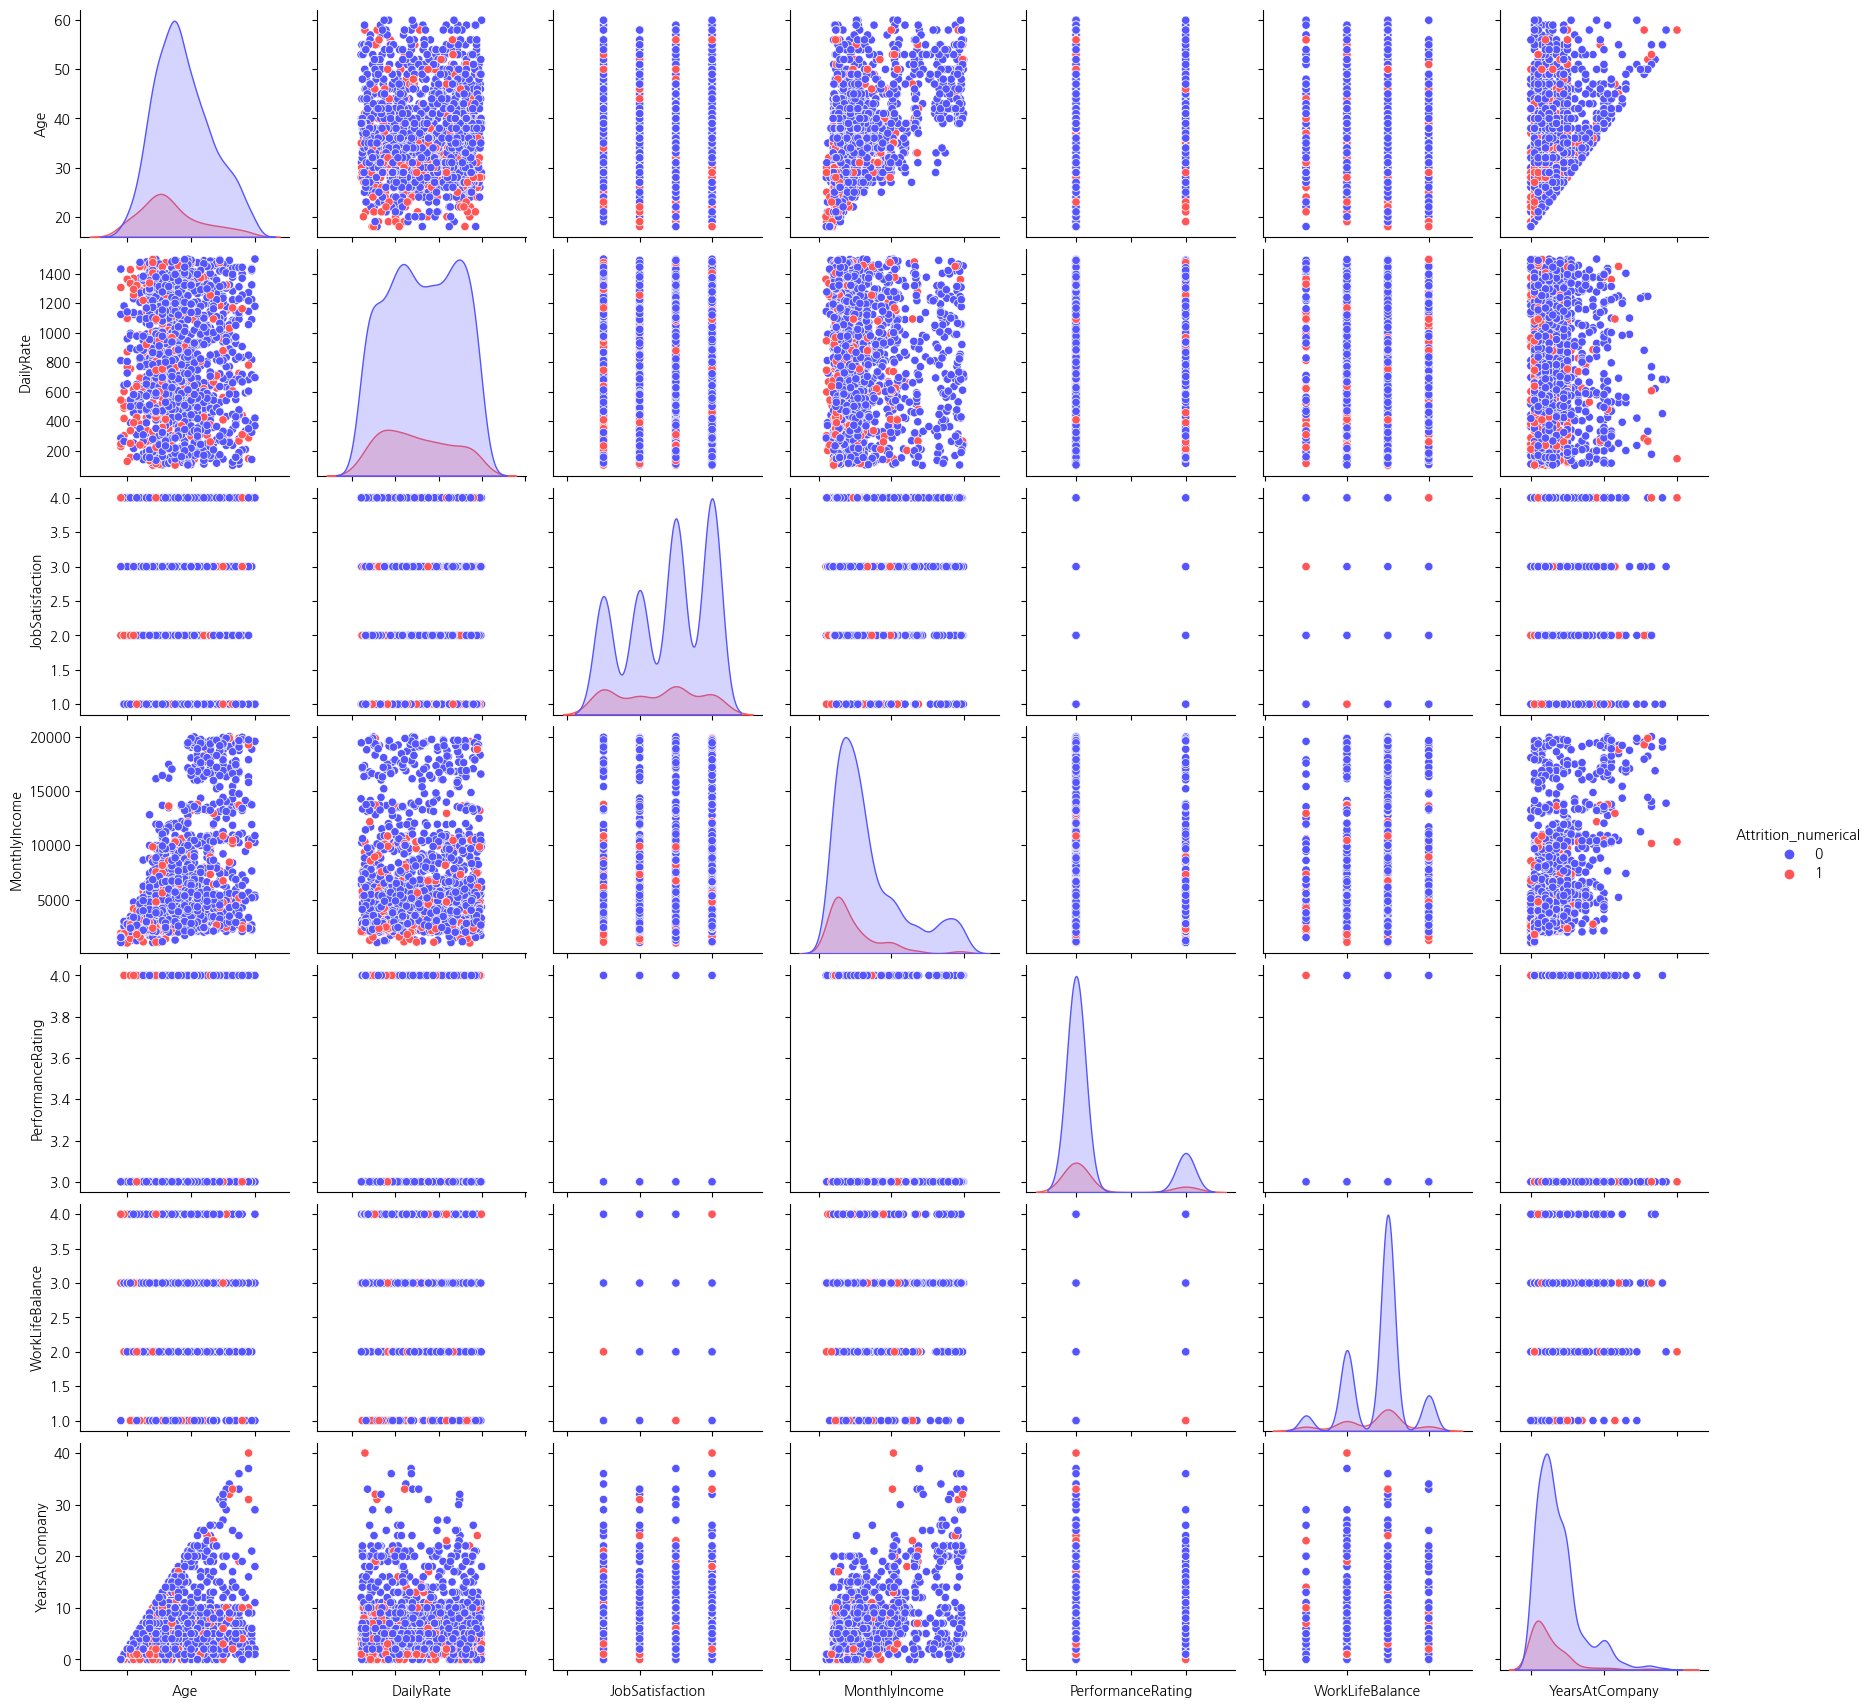

In [33]:
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

In [34]:
num_feat = attrition_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(attrition_num[comb[0]], attrition_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [35]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([['JobLevel', 'MonthlyIncome']], dtype='<U24')

In [36]:
# plotly 안 보이는 문제 해결

import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pio.renderers
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=attrition_num.astype(float).corr().values, # 피어슨 상관계수
        x=attrition_num.columns.values,
        y=attrition_num.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0

    )
]


layout = go.Layout(
    title='숫자형 Feature 들의 피어슨 상관계수',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,

)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')



In [37]:
attrition_num = attrition_num.drop(np.unique(high_corr_num[:, 0]), axis=1, errors='ignore')

In [38]:
attrition_cat_dummies.nunique().sort_values()

BusinessTravel_Non-Travel            2
MaritalStatus_Single                 2
MaritalStatus_Married                2
MaritalStatus_Divorced               2
JobRole_Sales Representative         2
JobRole_Sales Executive              2
JobRole_Research Scientist           2
JobRole_Research Director            2
JobRole_Manufacturing Director       2
JobRole_Manager                      2
JobRole_Laboratory Technician        2
JobRole_Human Resources              2
JobRole_Healthcare Representative    2
Gender_Male                          2
Gender_Female                        2
EducationField_Technical Degree      2
EducationField_Other                 2
EducationField_Medical               2
EducationField_Marketing             2
EducationField_Life Sciences         2
EducationField_Human Resources       2
Department_Sales                     2
Department_Research & Development    2
Department_Human Resources           2
BusinessTravel_Travel_Rarely         2
BusinessTravel_Travel_Fre

In [39]:
attrition_cat_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [40]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [41]:
rows= []

for var1 in attrition_cat_dummies:
  col = []
  for var2 in attrition_cat_dummies :
    cramers =cramers_V(attrition_cat_dummies[var1], attrition_cat_dummies[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = attrition_cat_dummies.columns, index =attrition_cat_dummies.columns)

df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
BusinessTravel_Non-Travel,0.99,0.03,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Frequently,0.03,1.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Rarely,0.27,0.56,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Department_Human Resources,0.00,0.00,0.00,0.98,0.08,0.02,0.40,0.00,0.00,0.00,...,0.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0.0
Department_Research & Development,0.00,0.00,0.00,0.08,1.00,0.82,0.03,0.02,0.23,0.03,...,0.06,0.03,0.13,0.54,0.11,0.0,0.0,0.0,0.0,0.0


In [42]:
high_corr_num = df[np.abs(df) >= 0.9]
high_corr_num

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
BusinessTravel_Non-Travel,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel_Travel_Frequently,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel_Travel_Rarely,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department_Human Resources,NaN,NaN,NaN,0.98,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department_Research & Development,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department_Sales,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField_Human Resources,NaN,NaN,NaN,NaN,NaN,NaN,0.96,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField_Life Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField_Marketing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField_Medical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat_dummies], axis=1)

In [44]:
attrition_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,5130,24907,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,3,2090,2396,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,3,2909,23159,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,2,3468,16632,...,0,0,0,0,0,0,1,0,1,0


In [45]:
data = [go.Bar(
            x=attrition["Attrition"].value_counts().index.values,
            y= attrition["Attrition"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

In [46]:
target = attrition["Attrition_numerical"]

In [48]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final,
                                                         target,
                                                         train_size= 0.80,
                                                         random_state=0);

In [49]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(train,target_train)

# 2.Modeling
- 분석 목표는 '직원 이탈의 주요한 원인(Feature)

## 2.1 RandomForest

In [50]:
from sklearn.model_selection import GridSearchCV

rf_params = { 'n_estimators' : [10, 100],
           'max_depth' : [4, 8, 10, 12],
           'min_samples_leaf' : [2, 4, 8, 12],
           'max_features' : [0.1, 0.3, 0.5]
            }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = rf_params, cv = 3, n_jobs = -1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9135


In [51]:
seed = 0
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_features': 0.1,
    'max_depth': 12,
    'min_samples_leaf': 2,
    'random_state' : seed,
    'verbose': 0
}

In [52]:
rf = RandomForestClassifier(**rf_params)

In [53]:
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*60)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.76      0.33      0.46        49

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



## 2.2 Gradient Boosting

In [54]:
from sklearn.model_selection import GridSearchCV

gb_params = { 'n_estimators' : [1000, 1500],
           'max_depth' : [4, 6],
           'min_samples_leaf' : [2, 4],
           'max_features' : [0.7, 0.9],
           'learning_rate' : [0.25,0.3]
            }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
gb_clf = GradientBoostingClassifier(random_state = 0)
grid_cv = GridSearchCV(gb_clf, param_grid = gb_params, cv = 3, n_jobs = -1)
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.3, 'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 4, 'n_estimators': 1000}
최고 예측 정확도: 0.9064


In [55]:
# Gradient Boosting Parameters
seed = 0
gb_params ={
    'n_estimators': 1000,
    'max_features': 0.9,
    'learning_rate' : 0.3,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'random_state' : seed,
    'verbose': 0
}

In [56]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(test)

In [57]:
print("Accuracy score: {}".format(accuracy_score(target_val, gb_predictions)))
print(classification_report(target_val, gb_predictions))

Accuracy score: 0.8605442176870748
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.64      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.76      0.66      0.69       294
weighted avg       0.84      0.86      0.84       294



## 2.3 RandomForest Feature Importance

In [58]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

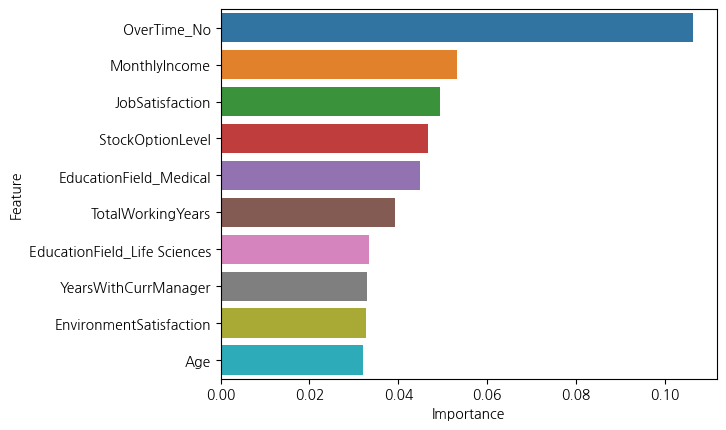

In [59]:
feat = attrition_final.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);

## 2.4 Gradient Boosting Feature Importance

In [60]:
# Scatter plot
trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

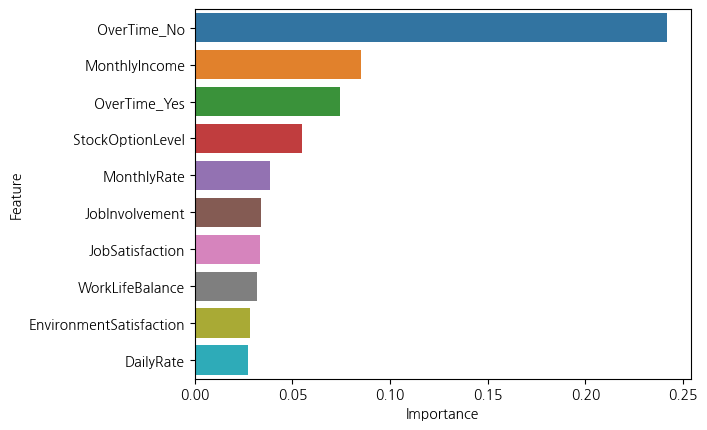

In [61]:
feat = attrition_final.columns.values
imp = gb.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);

## 부록

In [62]:
# combination
import itertools
arr = ['A', 'B', 'C']
nCr = itertools.combinations(arr, 2) # 두개로 좋바
print(list(nCr))

[('A', 'B'), ('A', 'C'), ('B', 'C')]


In [64]:
# all
# iterable한 객체를 인수로 받아서 원소가 모두 참이면 True, 아니면 False를 반환
a = all([1,2,3]) # True
a

True

In [65]:
a = all([1,2,3,0]) # False
a

False

In [68]:
# any
# iterable한 객체를 인수로 받아서 원소가 모두 참이면 True, 아니면 False를 반환
a = any([0,1,2]) # True
a

True

In [67]:
a = any([0, False, []]) # False
a

False

In [71]:
# chain
# iterable한 객체들을 인수로 받아 하나의 iterator로 반환
c1 = [1,2]
ca = ['A', 'B']
c = itertools.chain(c1, ca)
print(next(c))
    # 1
print(next(c))
    # 2
print(next(c))
    # A
print(next(c))
    # B

1
2
A
B
